**Employee Attrition Analysis**

Author: Zhengyang Xu

In [168]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('employee_attrition.csv')

## Data Preprocessing

In [551]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 35 columns):
Age                         1176 non-null int64
Attrition                   1176 non-null object
BusinessTravel              1176 non-null object
DailyRate                   1176 non-null int64
Department                  1176 non-null object
DistanceFromHome            1174 non-null float64
Education                   1176 non-null int64
EducationField              1176 non-null object
EmployeeCount               1176 non-null int64
EmployeeNumber              1176 non-null int64
EnvironmentSatisfaction     1176 non-null int64
Gender                      1175 non-null object
HourlyRate                  1176 non-null int64
JobInvolvement              1176 non-null int64
JobLevel                    1175 non-null float64
JobRole                     1176 non-null object
JobSatisfaction             1176 non-null int64
MaritalStatus               1176 non-null object
MonthlyIncome     

### Check missing data

In [6]:
df_miss = pd.DataFrame(df.isna().sum()[df.isna().sum() !=0].sort_values(ascending=False))
df_miss.columns = ['#Missing']
df_miss['Percent_Missing'] = df.isna().sum()/len(df)
df_miss

,#Missing,Percent_Missing
TotalWorkingYears,2,0.001701
DistanceFromHome,2,0.001701
YearsSinceLastPromotion,1,0.000850
RelationshipSatisfaction,1,0.000850
PerformanceRating,1,0.000850
PercentSalaryHike,1,0.000850
OverTime,1,0.000850
JobLevel,1,0.000850
Gender,1,0.000850


For each features, only 1 or 2 missing value among 1176 data points. For those missing values, we can simply remove it.

In [554]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1165 entries, 0 to 1175
Data columns (total 35 columns):
Age                         1165 non-null int64
Attrition                   1165 non-null object
BusinessTravel              1165 non-null object
DailyRate                   1165 non-null int64
Department                  1165 non-null object
DistanceFromHome            1165 non-null float64
Education                   1165 non-null int64
EducationField              1165 non-null object
EmployeeCount               1165 non-null int64
EmployeeNumber              1165 non-null int64
EnvironmentSatisfaction     1165 non-null int64
Gender                      1165 non-null object
HourlyRate                  1165 non-null int64
JobInvolvement              1165 non-null int64
JobLevel                    1165 non-null float64
JobRole                     1165 non-null object
JobSatisfaction             1165 non-null int64
MaritalStatus               1165 non-null object
MonthlyIncome     

## Early Data Exploration

To get the overview of data, the first thing is to get insigh of Target variable: Attrition. Below is some finding of Attrition.

In [97]:
df['Attrition'].value_counts()

No     991
Yes    185
Name: Attrition, dtype: int64

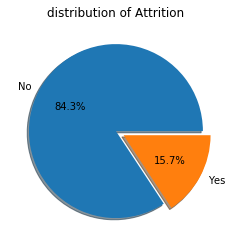

In [102]:
explode = (0,0.1)
plt.pie(df['Attrition'].value_counts(),labels = ['No','Yes'],autopct='%1.1f%%',
        shadow=True, explode = explode)
plt.title('distribution of Attrition')
plt.show()

This is an important aspect that will be further discussed in this kernel and that is dealing with imbalanced dataset. 84% of employees did not quit the organization while 16% did leave the organization. Knowing that we are dealing with an imbalanced dataset will help us determine what will be the best approach to implement our predictive model.

### Age variable

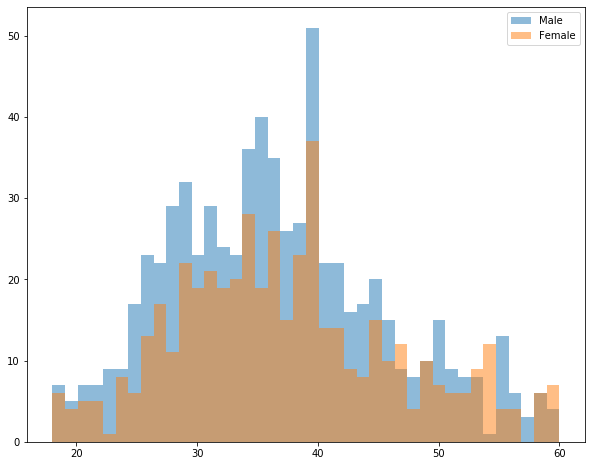

In [123]:
plt.figure(figsize=(10,8))
age_male = df[df['Gender'] == 'Male']['Age']
age_fe = df[df['Gender'] == 'Female']['Age']
# age_leave = df[df['Attrition'] == 'Yes']['Age']
plt.hist(age_male, bins=40, label='Male',alpha=0.5)
plt.hist(age_fe, bins=40, label='Female',alpha=0.5)
# plt.hist(age_leave, bins=40, label='Quit',alpha=0.5)
plt.legend(loc='best')
plt.show()

For the entire company, we can see that at every age range, male employee are slitly higher than female.

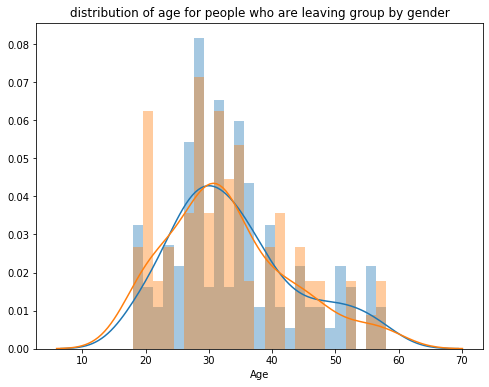

In [129]:
m1 = df[df['Gender'] == 'Male']
age_male = m1[m1['Attrition'] == 'Yes']['Age']

m2 = df[df['Gender'] == 'Female']
age_fe = m2[m2['Attrition'] == 'Yes']['Age']
plt.figure(figsize=(8,6))
sns.distplot(age_male,bins=25)
sns.distplot(age_fe,bins=25)
plt.title('distribution of age for people who are leaving group by gender')
plt.show()

From the plot above, we can say that there is no significant difference between male and female in people who are leaving from the company.

It seems that we could not get insight from general perspective stats and plot, we could think from proportion of age. Firstly, we divide people into different age groups like below. And then analyze each groups percentage of leaving,which might give us some information about Attrition.

**age groups:**
* 18 - 25
* 25 - 32
* 32 - 37
* 37 - 44
* 44 - 60

In [143]:
step1 = df[df['Age'] >= 18]
Age1 = step1[step1['Age'] < 25]

step2 = df[df['Age'] >= 25]
Age2 = step2[step2['Age'] < 32]

step3 = df[df['Age'] >= 32]
Age3 = step3[step3['Age'] < 37]

step4 = df[df['Age'] >= 37]
Age4 = step4[step4['Age'] < 44]

step5 = df[df['Age'] >= 44]
Age5 = step5[step5['Age'] < 60]


frames = [Age1['Attrition'].value_counts(normalize=True).to_frame(),
          Age2['Attrition'].value_counts(normalize=True).to_frame(),
          Age3['Attrition'].value_counts(normalize=True).to_frame(),
          Age4['Attrition'].value_counts(normalize=True).to_frame(),
          Age5['Attrition'].value_counts(normalize=True).to_frame()]
frames = [round(num,2) for num in frames]
result = pd.concat(frames)

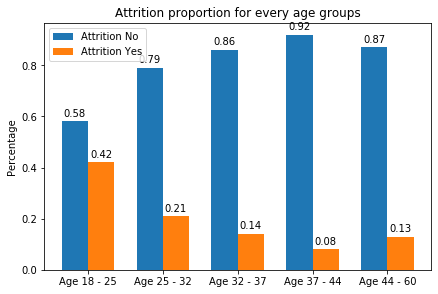

In [186]:
labels = ['Age 18 - 25','Age 25 - 32','Age 32 - 37','Age 37 - 44','Age 44 - 60']
no = result[result['Attrition'].index == 'No']['Attrition'].to_list()
yes = result[result['Attrition'].index == 'Yes']['Attrition'].to_list()
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, no, width, label='Attrition No')
rects2 = ax.bar(x + width/2, yes, width, label='Attrition Yes')

ax.set_ylabel('Percentage')
ax.set_title('Attrition proportion for every age groups')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)        
        
fig.tight_layout(pad=0.4, w_pad=0.8, h_pad=1.0)
plt.show()

After we visualize age and Attrition relationship as group, we could find out that for people who are in 18 - 25 age group has highest percentage of people to leave. And for this company, people who are below 30 age more likely to leave company.

### BusinessTravel Variable

In [190]:
df['BusinessTravel'].value_counts()

Travel_Rarely        839
Travel_Frequently    227
Non-Travel           110
Name: BusinessTravel, dtype: int64


Most of employee in this company travel rarely or no travel.

In [197]:
BV = df['BusinessTravel'].groupby(df['Attrition']).value_counts(normalize=True).to_frame()

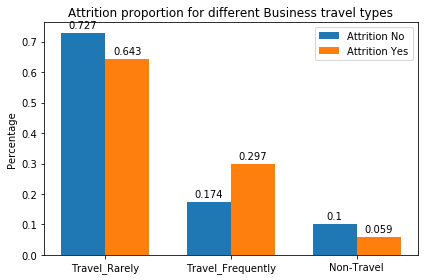

In [235]:
label2 = ['Travel_Rarely','Travel_Frequently','Non-Travel']
no_bv = [round(num,3) for num in BV['BusinessTravel'][0:3].to_list()]
yes_bv = [round(num,3) for num in BV['BusinessTravel'][3:].to_list()]

x = np.arange(len(label2))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, no_bv, width, label='Attrition No')
rects2 = ax.bar(x + width/2, yes_bv, width, label='Attrition Yes')

ax.set_ylabel('Percentage')
ax.set_title('Attrition proportion for different Business travel types')
ax.set_xticks(x)
ax.set_xticklabels(label2)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)        
        
fig.tight_layout()
plt.show()

By the plot above, we could know that except Travel frequently type, every other business travel type employee have a higher percentage of people who stay in the company than leaving the company. People who are travel frequently have a much higher percentage of people leaving, which is easy to explain by intuition. People who travel frequently in this company may feel stressed or tired, so they tend to change jobs.

### DailyRate & HourlyRate Variable

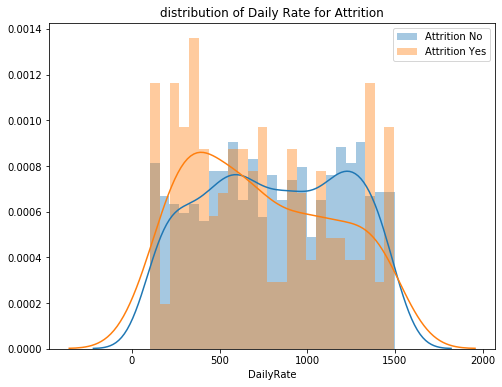

In [256]:
dr1 = df[df['Attrition'] == 'No']['DailyRate']
dr2 = df[df['Attrition'] == 'Yes']['DailyRate']

plt.figure(figsize=(8,6))
sns.distplot(dr1,bins=25,label='Attrition No')
sns.distplot(dr2,bins=25,label='Attrition Yes')
plt.title('distribution of Daily Rate for Attrition')
plt.legend()
plt.show()

By compared Leaving employee's Daily Rate and Stay employee's daily rate, we can notice that for people who have daily rate about 250 to 600, more people leave than stay. And roughtly above 600 daily rate more people would stay than leave.

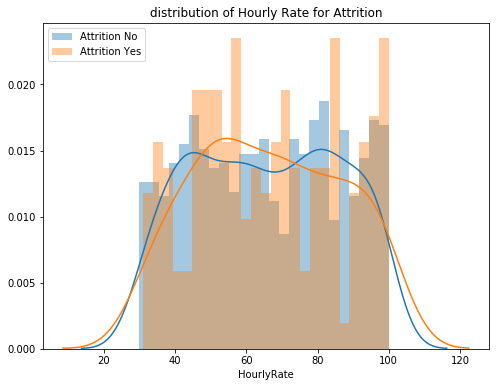

In [392]:
dr1 = df[df['Attrition'] == 'No']['HourlyRate']
dr2 = df[df['Attrition'] == 'Yes']['HourlyRate']

plt.figure(figsize=(8,6))
sns.distplot(dr1,bins=25,label='Attrition No')
sns.distplot(dr2,bins=25,label='Attrition Yes')
plt.title('distribution of Hourly Rate for Attrition')
plt.legend()
plt.show()

Not like Daily rate, people who have low hourly rate (25 - 45) have more people stay than people who have higher hourly rate (80 - 100). However, we do not invlove the work load to hourly rate, we will discuss it on below.

In [397]:
round(df['HourlyRate'].groupby(df['OverTime']).mean(),2)

OverTime
No     65.92
Yes    65.60
Name: HourlyRate, dtype: float64

there is no significant difference in hourly rate between over time people and not over time people

### Department Variable

In [257]:
round(df['Department'].groupby(df['Attrition']).value_counts(normalize=True),3)

Attrition  Department            
No         Research & Development    0.673
           Sales                     0.283
           Human Resources           0.044
Yes        Research & Development    0.524
           Sales                     0.422
           Human Resources           0.054
Name: Department, dtype: float64

from the table above, we can see that by change from stay group to leave group, Sales department increased from 28.3% to 42.2, which is most biggest change among all departments.

In [275]:
dp = df.groupby(['Attrition','Department'])['DailyRate'].mean().to_frame()

In [278]:
dp

DailyRate
Attrition Department                        
No        Human Resources         739.522727
          Research & Development  813.211394
          Sales                   820.171429
Yes       Human Resources         713.400000
          Research & Development  743.288660
          Sales                   736.192308

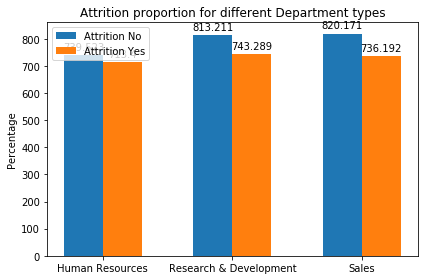

In [565]:
label3 = ['Human Resources','Research & Development','Sales']
no_dp = [round(num,3) for num in dp['DailyRate'][0:3].to_list()]
yes_dp = [round(num,3) for num in dp['DailyRate'][3:].to_list()]

x = np.arange(len(label3))
width = 0.30

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, no_dp, width, label='Attrition No')
rects2 = ax.bar(x + width/2, yes_dp, width, label='Attrition Yes')

ax.set_ylabel('Percentage')
ax.set_title('Attrition proportion for different Department types')
ax.set_xticks(x)
ax.set_xticklabels(label3)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)        
        
fig.tight_layout()
plt.show()

we can see that people who leaved company in all department have lower daily rate than people who stay.

### DistanceFromHome Variable

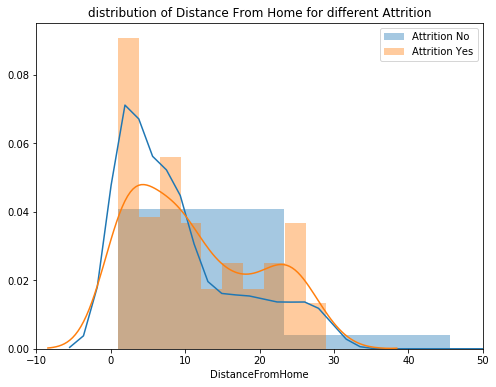

In [303]:
No_d = df[df['Attrition'] == 'No']['DistanceFromHome']
Yes_d = df[df['Attrition'] == 'Yes']['DistanceFromHome']

plt.figure(figsize=(8,6))
sns.distplot(No_d,bins=10,label='Attrition No')
sns.distplot(Yes_d,bins=10,label='Attrition Yes')
plt.title('distribution of Distance From Home for different Attrition')
plt.xlim(-10,50)
plt.legend()
plt.show()

from the plot above, the distribution of employee who stay in company more live closer from home than people who leave the company. between 0 to 10, percentage of people stay larger than people leave. Between 10 to 27, percentage of people leave larger than people stay.

### Education & EducationField Variable

In [311]:
round(df['Education'].groupby(df['Attrition']).value_counts(normalize=True) * 100,2)

Attrition  Education
No         3            37.84
           4            26.94
           2            20.18
           1            11.81
           5             3.23
Yes        3            41.62
           4            25.41
           2            18.92
           1            11.35
           5             2.70
Name: Education, dtype: float64

In [318]:
df['EducationField'].value_counts()

Life Sciences       477
Medical             381
Marketing           127
Technical Degree     97
Other                69
Human Resources      25
Name: EducationField, dtype: int64

In [323]:
round(df['EducationField'].groupby(df['Attrition']).value_counts(normalize=True) * 100,2)

Attrition  EducationField  
No         Life Sciences       41.17
           Medical             33.60
           Marketing            9.89
           Technical Degree     7.27
           Other                6.26
           Human Resources      1.82
Yes        Life Sciences       37.30
           Medical             25.95
           Marketing           15.68
           Technical Degree    13.51
           Human Resources      3.78
           Other                3.78
Name: EducationField, dtype: float64

for education field, we try to calculate the percentage of different education background people who are leaving, and it may give us some information of the relationship between education field and attrition

In [331]:
ef_all = df['EducationField'].value_counts().to_list()
ef_all[4], ef_all[5] = ef_all[5], ef_all[4]
ef_yes = df[df['Attrition'] == 'Yes']['EducationField'].value_counts().to_list()
label_ef = df[df['Attrition'] == 'Yes']['EducationField'].value_counts().to_frame().index.to_list()

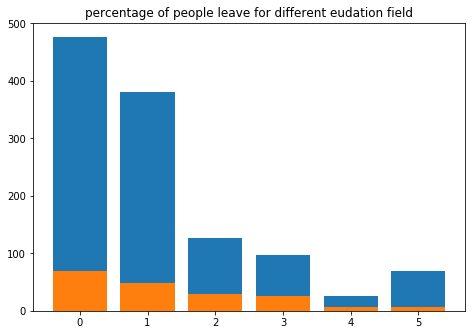

In [364]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = np.arange(6)
ax.bar(x,ef_all)
ax.bar(x,ef_yes)
# for i,v in enumerate(ef_yes):
#     ax.text(x=v+1, y=i,str(v))
plt.title('percentage of people leave for different eudation field')
plt.show()

### EnvironmentSatisfaction

In [374]:
round(df['EnvironmentSatisfaction'].groupby(df['Attrition']).value_counts(normalize=True)*100,2)

Attrition  EnvironmentSatisfaction
No         3                          31.79
           4                          30.78
           2                          19.78
           1                          17.66
Yes        1                          31.35
           3                          27.57
           4                          23.24
           2                          17.84
Name: EnvironmentSatisfaction, dtype: float64

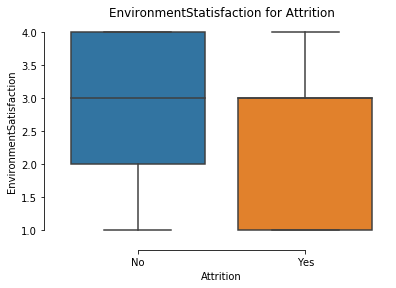

In [387]:
# sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x='Attrition',y='EnvironmentSatisfaction',data=df)
sns.despine(offset=10, trim=True)
plt.title('EnvironmentStatisfaction for Attrition')
plt.show()

The average Environment statisfaction for people who are leaving is much lower than people who stay

### Income related variables

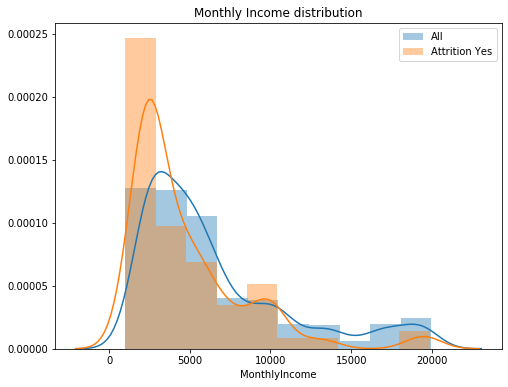

In [406]:
income = df['MonthlyIncome']
yes_in = df[df['Attrition'] == 'Yes']['MonthlyIncome']
plt.figure(figsize=(8,6))
sns.distplot(income,bins=10,label='All')
sns.distplot(yes_in,bins=10,label='Attrition Yes')
plt.legend()
plt.title('Monthly Income distribution')
plt.show()

From the relationship between Monthly income and Attrition, it is obvious that low income employee more willing to leave than high income employee.

#### Income and JobSatisfaction

In [428]:
ij = df.groupby(['Attrition','JobSatisfaction'])['MonthlyIncome'].mean().to_frame()

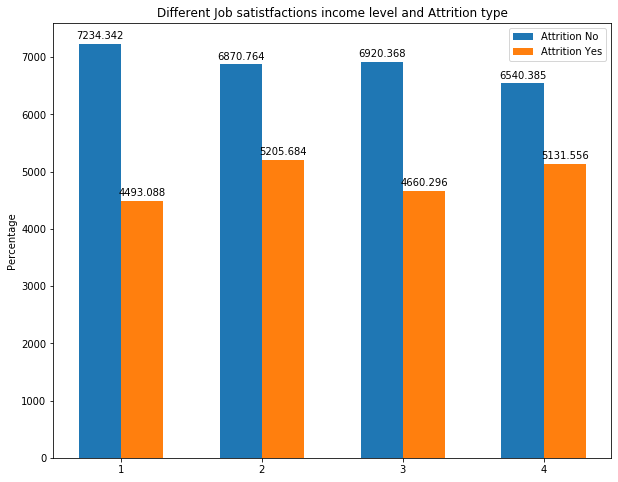

In [442]:
label2 = ['1','2','3','4']
no_ij = [round(num,3) for num in ij['MonthlyIncome'][0:4].to_list()]
yes_ij = [round(num,3) for num in ij['MonthlyIncome'][4:].to_list()]


x = np.arange(len(label2))
width = 0.30

fig, ax = plt.subplots(figsize=(10,8))
rects1 = ax.bar(x - width/2, no_ij, width, label='Attrition No')
rects2 = ax.bar(x + width/2, yes_ij, width, label='Attrition Yes')

ax.set_ylabel('Income')
ax.set_title('Different Job satistfactions income level and Attrition type')
ax.set_xticks(x)
ax.set_xticklabels(label2)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)        
        
# fig.tight_layout()

plt.show()

people who leaved company have low monthly income than people stay, and also people who have lowest satisfaction (1) and leaved company have lowest average monthly income among all categories. 

#### Income and RelationshipSatisfaction

In [501]:
rs = df.groupby(['Attrition','RelationshipSatisfaction'])['MonthlyIncome'].mean().to_frame()

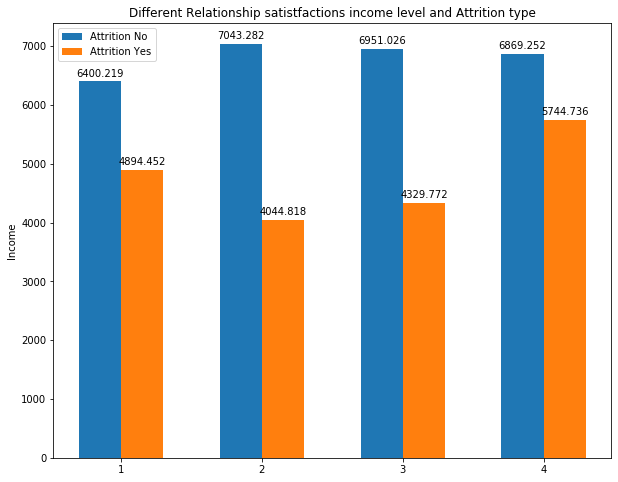

In [505]:
label2 = ['1','2','3','4']
no_rs = [round(num,3) for num in rs['MonthlyIncome'][0:4].to_list()]
yes_rs = [round(num,3) for num in rs['MonthlyIncome'][4:].to_list()]


x = np.arange(len(label2))
width = 0.30

fig, ax = plt.subplots(figsize=(10,8))
rects1 = ax.bar(x - width/2, no_rs, width, label='Attrition No')
rects2 = ax.bar(x + width/2, yes_rs, width, label='Attrition Yes')

ax.set_ylabel('Income')
ax.set_title('Different Relationship satistfactions income level and Attrition type')
ax.set_xticks(x)
ax.set_xticklabels(label2)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)        
        
# fig.tight_layout()

plt.show()

People who has relevantly low relationship satisfactions (2) and leaved company has lowest income (4044.818).

### MaritalStatus

In [453]:
msno = df['MaritalStatus'].groupby(df['Attrition']).value_counts().to_frame()['MaritalStatus'][0:3].to_list()
msyes = df['MaritalStatus'].groupby(df['Attrition']).value_counts().to_frame()['MaritalStatus'][3:].to_list()
msno[0], msno[1] = msno[1], msno[0]

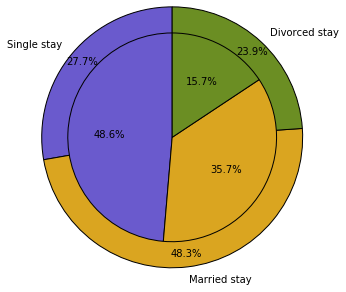

In [469]:
fig, ax = plt.subplots()
labels = ['Single stay','Married stay','Divorced stay']
label2 = ['Single leave','Married leave','Divorced leave']
colors = ['slateblue','goldenrod','olivedrab']
pie_1 = ax.pie(msno,startangle=90,autopct='%1.1f%%',radius=1.5,pctdistance = 0.9,colors = colors,labels=labels)
pie_2 = ax.pie(msyes,startangle=90,autopct='%1.1f%%',radius=1.2,pctdistance = 0.6,colors = colors)

for pie_wedge in pie_1[0]:
    pie_wedge.set_edgecolor('black')
for pie_wedge in pie_2[0]:
    pie_wedge.set_edgecolor('black')

ax.set(aspect="equal")
plt.show()

From the double pie chart above, we can clearly saw that people who are single have much higer weight in leave group than stay group. Divorced and Married take smaller percentage in leave group than stay group.

### Stock Option Level

In [499]:
round(df['StockOptionLevel'].value_counts(normalize=True).to_frame()*100,2)

,StockOptionLevel
0,42.52
1,40.99
2,10.88
3,5.61


In [500]:
print('Stock Option Level for people who leaved')
round(df[df['Attrition'] == 'Yes']['StockOptionLevel'].value_counts(normalize=True).to_frame() * 100,2)

Stock Option Level for people who leaved


,StockOptionLevel
0,64.32
1,23.24
3,7.03
2,5.41


most of People who are leaving are holding zero stock option.

### Performance Rating Variable

In [498]:
df['PerformanceRating'].value_counts(normalize=True)

3.0    0.837447
4.0    0.162553
Name: PerformanceRating, dtype: float64

In [497]:
df[df['Attrition'] == 'Yes']['PerformanceRating'].value_counts(normalize=True)

3.0    0.815217
4.0    0.184783
Name: PerformanceRating, dtype: float64

In [485]:
df['JobInvolvement'].value_counts()

3    690
2    295
4    124
1     67
Name: JobInvolvement, dtype: int64

In [486]:
df['JobLevel'].value_counts()

2.0    432
1.0    430
3.0    172
4.0     84
5.0     57
Name: JobLevel, dtype: int64

In [487]:
df['JobRole'].value_counts()

Sales Executive              263
Research Scientist           220
Laboratory Technician        209
Manufacturing Director       122
Healthcare Representative    108
Manager                       79
Sales Representative          67
Research Director             65
Human Resources               43
Name: JobRole, dtype: int64

### Years related Variables

#### TotalWorkingYears, YearsAtCompany and YearsInCurrentRole

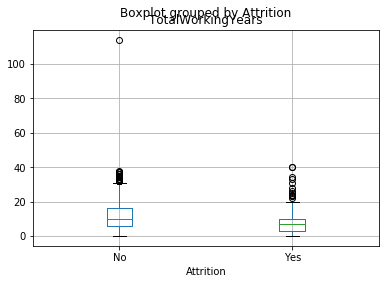

In [531]:
df.boxplot(column=['TotalWorkingYears'],by='Attrition')
plt.show()

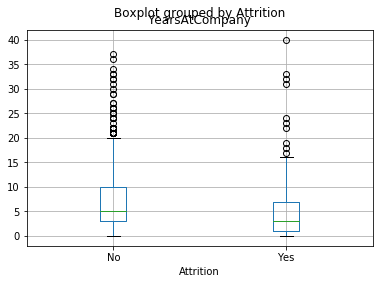

In [533]:
df.boxplot(column=['YearsAtCompany'],by='Attrition')
plt.show()

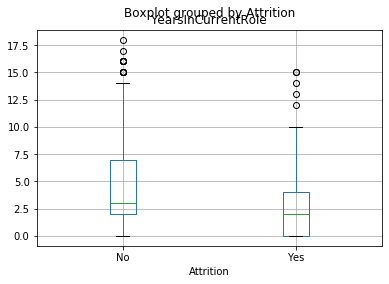

In [534]:
df.boxplot(column=['YearsInCurrentRole'],by='Attrition')
plt.show()

From three boxplot above, we can see that Average of TotalWorkingYears, YearsAtCompany, YearsInCurrentRole for people who leave company are lower than people who stay.

#### Training Times Last Year

In [540]:
df['TrainingTimesLastYear'].groupby(df['Attrition']).describe()

,count,mean,std,min,25%,50%,75%,max
Attrition,,,,,,,,
No,991.0,2.847629,1.312716,0.0,2.0,3.0,3.0,6.0
Yes,185.0,2.605405,1.264470,0.0,2.0,2.0,3.0,6.0


In [548]:
from scipy.stats import ttest_ind
ttest_ind(df[df['Attrition'] == 'Yes']['TrainingTimesLastYear'],
          df[df['Attrition'] == 'No']['TrainingTimesLastYear'])

Ttest_indResult(statistic=-2.317040698690393, pvalue=0.020672895900133045)

The average training times last year for people who leave company slightly lower than people who stay. And from the T-test, we can see that there is a significant difference for training times last year for people who leave and stay.

#### YearsWithCurrManager

In [542]:
df['YearsWithCurrManager'].groupby(df['Attrition']).describe()

,count,mean,std,min,25%,50%,75%,max
Attrition,,,,,,,,
No,991.0,4.523713,7.710886,0.0,2.0,3.0,7.0,219.0
Yes,185.0,2.735135,3.062769,0.0,0.0,2.0,4.0,14.0


In [547]:
ttest_ind(df[df['Attrition'] == 'Yes']['YearsWithCurrManager'],
          df[df['Attrition'] == 'No']['YearsWithCurrManager'])

Ttest_indResult(statistic=-3.1085894755234524, pvalue=0.0019250323046365848)

The average YearsWithCurrManager for people who leave company are significant lower than people who stay. And from the T-test, we can see that there is a significant difference for YearsWithCurrManager for people who leave and stay.

#### YearsSinceLastPromotion

In [549]:
df['YearsSinceLastPromotion'].groupby(df['Attrition']).describe()

,count,mean,std,min,25%,50%,75%,max
Attrition,,,,,,,,
No,990.0,2.193939,3.205588,0.0,0.0,1.0,3.0,15.0
Yes,185.0,1.756757,3.045001,0.0,0.0,1.0,2.0,15.0


The average of YearsSinceLastPromotion also lower for people who leave company than people who stay

## Association Rule Analysis

### Data Preparation for Arule

Based on interesting points we found on EDA part, we will doing some feature transformation to prepare data for association rule analysis.

#### Age variable to categorical

step1 = df[df['Age'] >= 18]
Age1 = step1[step1['Age'] < 25]

step2 = df[df['Age'] >= 25]
Age2 = step2[step2['Age'] < 32]

step3 = df[df['Age'] >= 32]
Age3 = step3[step3['Age'] < 37]

step4 = df[df['Age'] >= 37]
Age4 = step4[step4['Age'] < 44]

step5 = df[df['Age'] >= 44]
Age5 = step5[step5['Age'] < 60]

In [559]:
def age(data):
    if data >= 18 and data < 25:
        return 'Age 18 - 25'
    elif data>=25 and data < 32:
        return 'Age 25 - 32'
    elif data >= 32 and data <37:
        return 'Age 32 - 37'
    elif data >= 37 and data < 44:
        return 'Age 37 - 44'
    elif data >= 44 and data < 60:
        return 'Age 44 - 60'
df['Age_c'] = df['Age'].apply(lambda x: age(x))

#### Daily Rate
by EDA, we roughtly sperate into three groups:
* low daily rate: 0 - 500
* high daily rate: 500 - 1500
* extremly high daily rate: 1500 - max

In [560]:
def DR(data):
    if data < 500:
        return 'low daily rate'
    elif data >= 500 and data < 1500:
        return 'high daily rate'
    elif data >= 1500:
        return 'extremly high daily rate'
df['DailyRate_c'] = df['DailyRate'].apply(lambda x: DR(x))

#### Hourly Rate
* hourly rate 0 - 45
* hourly rate 45 - 75
* hourly rate 75 - 95
* hourly beyond 95

In [562]:
def HR(data):
    if data < 45:
        return 'hourly rate 0 - 45'
    elif data >= 45 and data < 75:
        return 'hourly rate 45 - 75'
    elif data >= 75 and data < 95:
        return 'hourly rate 75 - 95'
    elif data >= 95:
        return 'hourly beyond 95'
df['HourlyRate_c'] = df['HourlyRate'].apply(lambda x: HR(x))

#### Distance From Home 
* close: 0 - 10
* median distance: 10 - 30
* far: 30 - max

In [566]:
def dfh(data):
    if data < 10:
        return 'close'
    elif data >= 10 and data < 30:
        return 'median distance'
    elif data >= 30:
        return 'far'
df['DistanceFromHome_c'] = df['DistanceFromHome'].apply(lambda x: dfh(x))

#### Month Income
* low income: less than 4500
* fair high: greater than 4500

In [568]:
def mi(data):
    if data <= 4500:
        return 'low income'
    else:
        return 'fair high'
df['MonthlyIncome_c'] = df['MonthlyIncome'].apply(lambda x: mi(x))

#### Stock Option level
* no: level = 0
* yes: level > 0

In [603]:
def sol(data):
    if data == 0:
        return 'Stock Option No'
    else:
        return 'Stock Option Yes'
df['StockOptionLevel_c'] = df['StockOptionLevel'].apply(lambda x: sol(x))

#### other numerical variables

In [688]:
def pfr(data):
    if data == 3:
        return '3_PerformanceRating'
    elif data == 4:
        return '4_PerformanceRating'
df['PerformanceRating_c'] = df['PerformanceRating'].apply(lambda x: pfr(x))

In [692]:
df['JobInvolvement_'] = df['JobInvolvement'].apply(lambda x: 'JobInvolvement_' + str(x))
df['JobLevel_'] = df['JobLevel'].apply(lambda x: 'JobLevel_' + str(x))
df['TotalWorkingYears_'] = pd.qcut(df.TotalWorkingYears, 3,
                                   labels=['TotalWorkingYears_low','TotalWorkingYears_med','TotalWorkingYears_high'])

df['JobInvolvement_'] = df['JobInvolvement'].apply(lambda x: 'JobInvolvement_' + str(x))
df['JobLevel_'] = df['JobLevel'].apply(lambda x: 'JobLevel_' + str(x))

df['YearsInCurrentRole_'] = pd.qcut(df.YearsInCurrentRole, 3,
                                   labels=['YearsInCurrentRole_low','YearsInCurrentRole_med','YearsInCurrentRole_high'])

df['TrainingTimesLastYear_'] = pd.qcut(df.TrainingTimesLastYear, 3,
                                   labels=['TrainingTimesLastYear_low','TrainingTimesLastYear_med','TrainingTimesLastYear_high'])

In [697]:
df['YearsWithCurrManager_'] = pd.qcut(df.YearsWithCurrManager, 3,
                                   labels=['YearsWithCurrManager_low','YearsWithCurrManager_med','YearsWithCurrManager_high'])

### Association Rule

In [592]:
from mlxtend.frequent_patterns import apriori, association_rules 
import apyori as ap
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules

In [700]:
df1 = df[['Age_c','DailyRate_c','HourlyRate_c','DistanceFromHome_c',
          'MonthlyIncome_c','StockOptionLevel_c','Attrition','Department',
          'Education','EnvironmentSatisfaction','Gender','JobSatisfaction',
          'MaritalStatus','OverTime','RelationshipSatisfaction','PerformanceRating_c','TotalWorkingYears_',
          'YearsAtCompany_','YearsInCurrentRole_','TrainingTimesLastYear_','YearsWithCurrManager_']].dropna()

In [709]:
df1['Attrition'] = df1['Attrition'].apply(lambda x: 'Attrition_' + str(x))
df1['Education'] = df1['Education'].apply(lambda x: 'Education_' + str(x))
df1['EnvironmentSatisfaction'] = df1['EnvironmentSatisfaction'].apply(lambda x: 'EnvironmentSatisfaction_' + str(x))
df1['JobSatisfaction'] = df1['JobSatisfaction'].apply(lambda x: 'JobSatisfaction_' + str(x))
df1['OverTime'] = df1['OverTime'].apply(lambda x: 'OverTime_' + str(x))
df1['RelationshipSatisfaction'] = df1['RelationshipSatisfaction'].apply(lambda x: 'RelationshipSatisfaction_' + str(x))

In [714]:
records = []
for i in range(0,len(df1)):
    records.append([str(df1.values[i,j])
    for j in range(0, len(df1.columns))])
#     for j in range(len(df1.columns)):
#         records.append([str(df1.values[i,j])])
frequent_itemset = ap.apriori(records)
results = list(frequent_itemset)
len(results)
results[1:5]

[RelationRecord(items=frozenset({'4_PerformanceRating'}), support=0.16351118760757316, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'4_PerformanceRating'}), confidence=0.16351118760757316, lift=1.0)]),
 RelationRecord(items=frozenset({'Age 25 - 32'}), support=0.24268502581755594, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Age 25 - 32'}), confidence=0.24268502581755594, lift=1.0)]),
 RelationRecord(items=frozenset({'Age 32 - 37'}), support=0.2314974182444062, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Age 32 - 37'}), confidence=0.2314974182444062, lift=1.0)]),
 RelationRecord(items=frozenset({'Age 37 - 44'}), support=0.23235800344234078, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Age 37 - 44'}), confidence=0.23235800344234078, lift=1.0)])]

In [724]:
te = TransactionEncoder()
te_ary = te.fit(records).transform(records)
df_ar = pd.DataFrame(te_ary, columns=te.columns_)
frequent_itemsets = apriori(df_ar, min_support=0.2, use_colnames=True) #,
frequent_itemsets.sort_values(by='support', ascending=False).head(10)
rules = association_rules(frequent_itemsets,metric='lift')
rules.head()
rules[(rules['lift']>1) & (rules['confidence'] > 0.5)].head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(3_PerformanceRating),(Attrition_No),0.836489,0.842513,0.708262,0.846708,1.004979,0.003509,1.027365
3,(Attrition_No),(3_PerformanceRating),0.842513,0.836489,0.708262,0.840654,1.004979,0.003509,1.026138
6,(Education_4),(3_PerformanceRating),0.265921,0.836489,0.228055,0.857605,1.025244,0.005615,1.148294
10,(EnvironmentSatisfaction_4),(3_PerformanceRating),0.297762,0.836489,0.253873,0.852601,1.019262,0.004798,1.109311
14,(JobSatisfaction_3),(3_PerformanceRating),0.302926,0.836489,0.261618,0.863636,1.032454,0.008224,1.199082
18,(Male),(3_PerformanceRating),0.590361,0.836489,0.496558,0.841108,1.005522,0.002727,1.029070
19,(3_PerformanceRating),(Male),0.836489,0.590361,0.496558,0.593621,1.005522,0.002727,1.008022
25,(OverTime_Yes),(3_PerformanceRating),0.287435,0.836489,0.240964,0.838323,1.002193,0.000527,1.011347
27,(RelationshipSatisfaction_3.0),(3_PerformanceRating),0.310671,0.836489,0.261618,0.842105,1.006714,0.001745,1.035571
28,(RelationshipSatisfaction_4.0),(3_PerformanceRating),0.295181,0.836489,0.251291,0.851312,1.017721,0.004376,1.099693


In [748]:
def SupervisedApriori(data,consequent,min_supp,min_conf,min_lift):
    frequent_itemsets = apriori(data, min_supp, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="confidence",
                              min_threshold = min_conf)
    
    rules = rules[rules['lift'] > min_lift]
    sup_rules = pd.DataFrame()
    for i in consequent:
        df = rules[rules['consequents'] == {i}]
        sup_rules = sup_rules.append(df,ignore_index = True)
    return(sup_rules)

In [760]:
ar_yes = SupervisedApriori(df_ar, consequent = ['Attrition_Yes'],
                  min_supp=0.04, min_conf=0.3,min_lift= 1).sort_values(by='support',ascending =False)

In [755]:
ar_yes.sort_values(by='confidence')['antecedents'][19248]

frozenset({'3_PerformanceRating',
           'Male',
           'OverTime_No',
           'Single',
           'Stock Option No'})

In [763]:
ar_yes.sort_values(by='consequent support').head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
25,"(YearsInCurrentRole_low, TotalWorkingYears_low)",(Attrition_Yes),0.258176,0.157487,0.077453,0.300000,1.904918,0.036793,1.203590
130,"(YearsWithCurrManager_low, Male, TotalWorkingY...",(Attrition_Yes),0.135972,0.157487,0.043029,0.316456,2.009407,0.021615,1.232565
131,"(YearsWithCurrManager_low, low income, Male, Y...",(Attrition_Yes),0.142857,0.157487,0.043029,0.301205,1.912568,0.020531,1.205665
67,"(Stock Option No, high daily rate, YearsAtComp...",(Attrition_Yes),0.135112,0.157487,0.043029,0.318471,2.022206,0.021751,1.236211
135,"(low income, Stock Option No, TotalWorkingYear...",(Attrition_Yes),0.098107,0.157487,0.043029,0.438596,2.784968,0.027579,1.500726


By top 5 association rule for people who leave, We find out some interesting facts. the top confidence association rule for leaving is people who have low performanceRating, male, single with no stock option, which means no contribution, low performance, and not in relationship. And from the top list association rule by consequent support, it show us that people who stay in company shorter, and just started career(young person) willing to leave.

In [759]:
ar_no = SupervisedApriori(df_ar, consequent = ['Attrition_No'],
                  min_supp=0.04, min_conf=0.3,min_lift= 1).sort_values(by='support',ascending =False)

In [765]:
ar_no.sort_values(by='consequent support').head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(3_PerformanceRating),(Attrition_No),0.836489,0.842513,0.708262,0.846708,1.004979,0.003509,1.027365
14742,"(close, Research & Development, RelationshipSa...",(Attrition_No),0.055077,0.842513,0.046472,0.843750,1.001468,0.000068,1.007917
13986,"(YearsAtCompany_high, YearsWithCurrManager_hig...",(Attrition_No),0.053356,0.842513,0.046472,0.870968,1.033774,0.001518,1.220525
22767,"(high daily rate, JobSatisfaction_3, Male, fai...",(Attrition_No),0.050775,0.842513,0.046472,0.915254,1.086339,0.003693,1.858348
19516,"(median distance, Male, Stock Option Yes, Trai...",(Attrition_No),0.054217,0.842513,0.046472,0.857143,1.017365,0.000793,1.102410


By looking at association rule for people who stay, we can see that peoeple who stay in company longer, close to company, or holding stock option more likely stay.
In general, people who have stronger relationship with company (long time, high salary etc.) more likely to stay.